<a href="https://colab.research.google.com/github/Praneeth-18/DataMining5/blob/main/Image%20dataset/Image_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
# Install necessary packages
!pip install -U matplotlib Pillow


In [4]:
from google.colab import drive
drive.mount('/content/drive')

# Assuming your dataset is located in the root directory of your Google Drive
!unzip "/content/drive/MyDrive/Datasets for CMPE 255/Pistachio.zip" -d "/content/dataset"


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
Archive:  /content/drive/MyDrive/Datasets for CMPE 255/Pistachio.zip
  inflating: /content/dataset/Kirmizi_Pistachio/kirmizi (1).jpg  
  inflating: /content/dataset/Kirmizi_Pistachio/kirmizi (10).jpg  
  inflating: /content/dataset/Kirmizi_Pistachio/kirmizi (11).jpg  
  inflating: /content/dataset/Kirmizi_Pistachio/kirmizi (12).jpg  
  inflating: /content/dataset/Kirmizi_Pistachio/kirmizi (13).jpg  
  inflating: /content/dataset/Kirmizi_Pistachio/kirmizi (14).jpg  
  inflating: /content/dataset/Kirmizi_Pistachio/kirmizi (15).jpg  
  inflating: /content/dataset/Kirmizi_Pistachio/kirmizi (16).jpg  
  inflating: /content/dataset/Kirmizi_Pistachio/kirmizi (17).jpg  
  inflating: /content/dataset/Kirmizi_Pistachio/kirmizi (18).jpg  
  inflating: /content/dataset/Kirmizi_Pistachio/kirmizi (19).jpg  
  inflating: /content/dataset/Kirmizi_Pistachio/kirmizi (2).jpg  


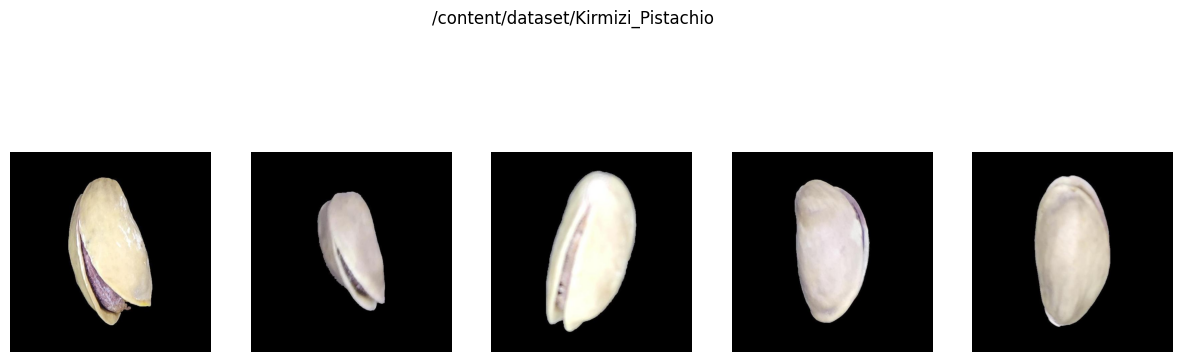

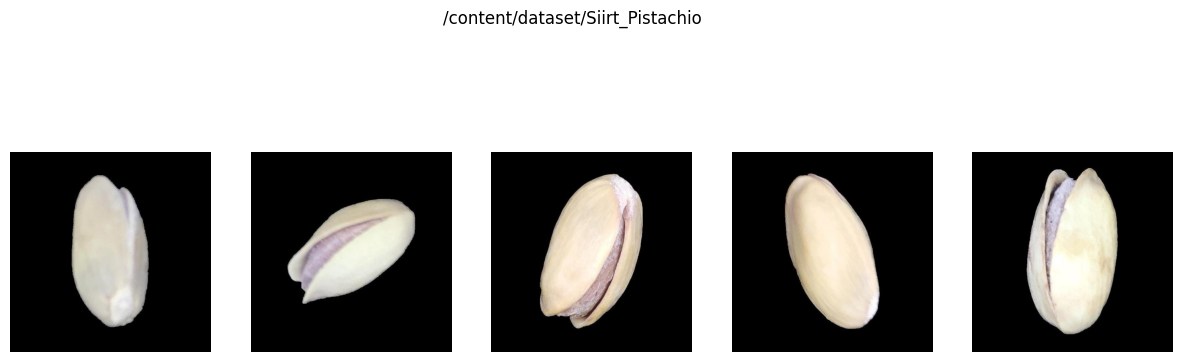

In [5]:
import os
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image

# Paths
kirmizi_path = "/content/dataset/Kirmizi_Pistachio"
siirt_path = "/content/dataset/Siirt_Pistachio"

kirmizi_images = os.listdir(kirmizi_path)
siirt_images = os.listdir(siirt_path)

# Display sample images
def display_sample_images(images, title, num_samples=5):
    plt.figure(figsize=(15,5))
    for i, img_file in enumerate(images[:num_samples]):
        img_path = os.path.join(title, img_file)
        img = mpimg.imread(img_path)
        plt.subplot(1, num_samples, i+1)
        plt.imshow(img)
        plt.axis('off')
    plt.suptitle(title)
    plt.show()

display_sample_images(kirmizi_images, kirmizi_path)
display_sample_images(siirt_images, siirt_path)

In [6]:
def check_corrupted_images(images, base_path):
    corrupted = []
    for img_file in images:
        img_path = os.path.join(base_path, img_file)
        try:
            img = Image.open(img_path)
            img.verify()  # This will check for corrupt images
        except:
            corrupted.append(img_path)
    return corrupted

kirmizi_corrupted = check_corrupted_images(kirmizi_images, kirmizi_path)
siirt_corrupted = check_corrupted_images(siirt_images, siirt_path)

print(f"Corrupted images in Kirmizi_Pistachio: {len(kirmizi_corrupted)}")
print(f"Corrupted images in Siirt_Pistachio: {len(siirt_corrupted)}")

Corrupted images in Kirmizi_Pistachio: 0
Corrupted images in Siirt_Pistachio: 0


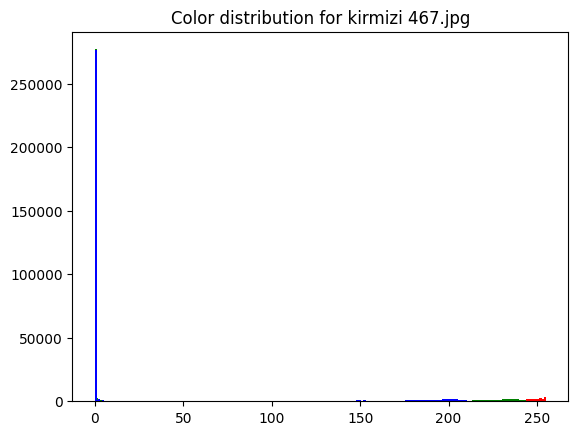

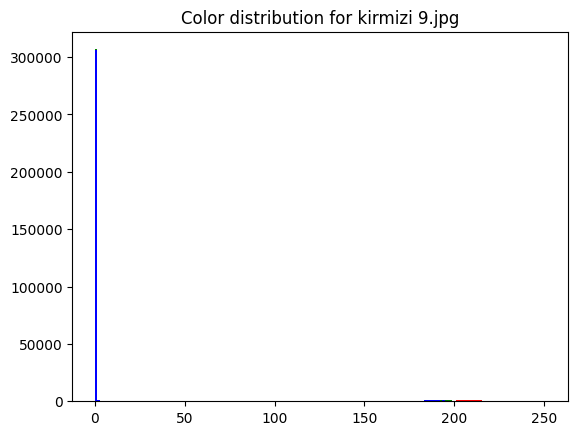

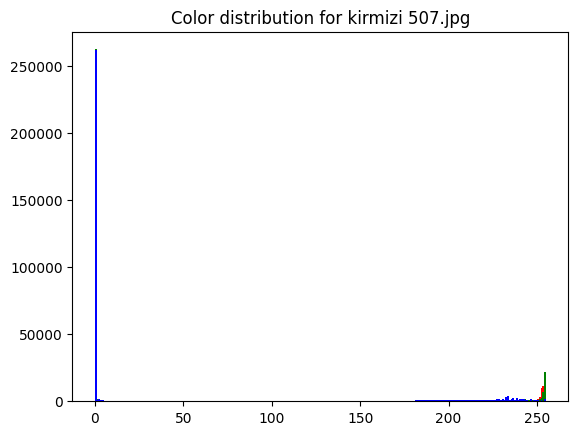

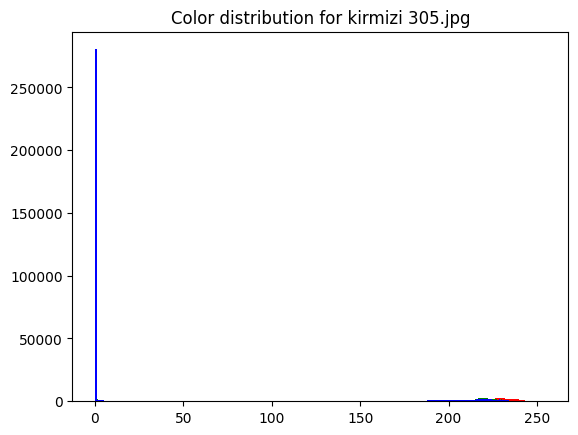

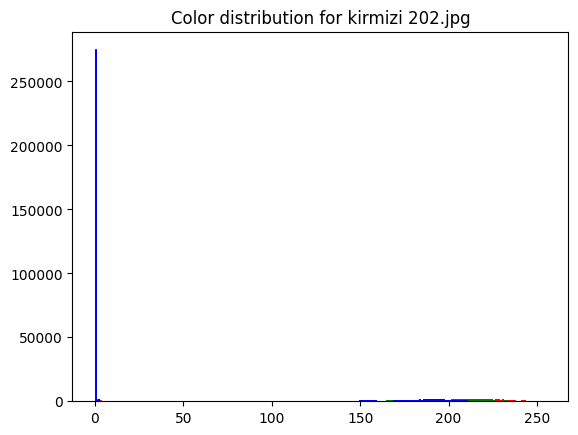

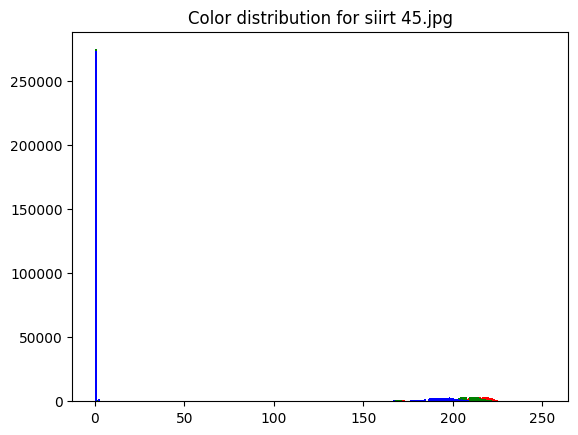

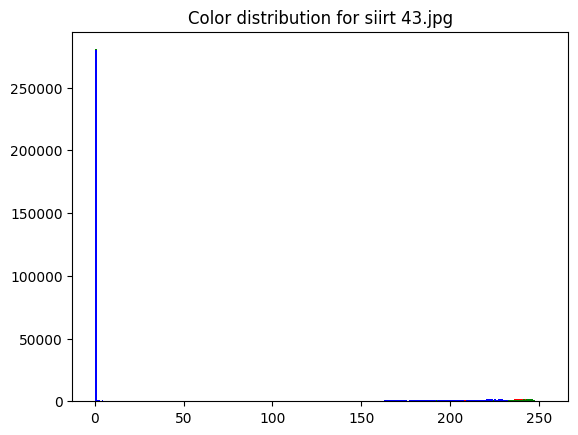

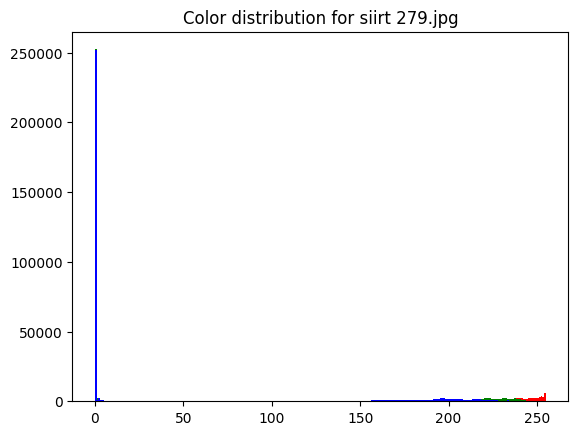

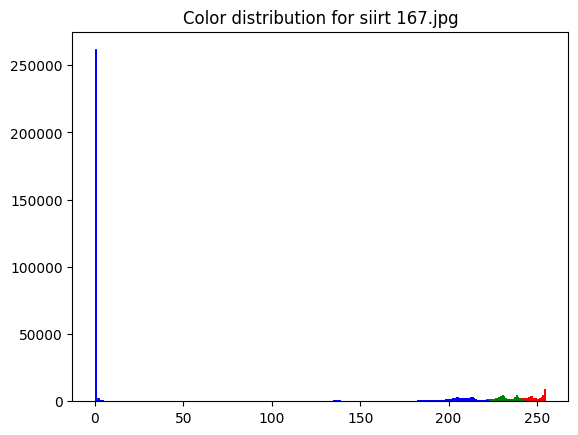

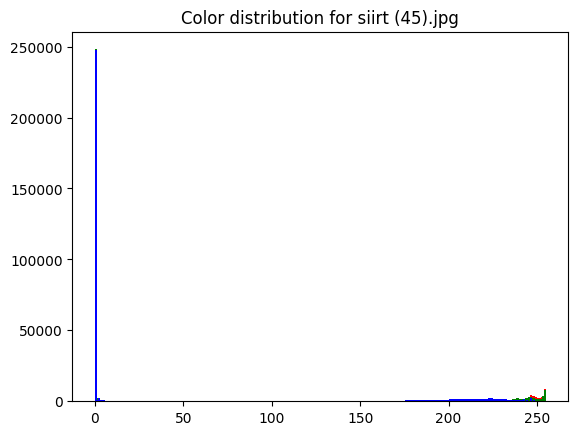

In [7]:
import numpy as np

def plot_color_distribution(images, base_path, num_samples=5):
    for i, img_file in enumerate(images[:num_samples]):
        img_path = os.path.join(base_path, img_file)
        img = mpimg.imread(img_path)
        colors = ('r', 'g', 'b')
        for i, color in enumerate(colors):
            plt.hist(img[...,i].ravel(), bins=256, color=color)
            plt.title(f"Color distribution for {img_file}")
        plt.show()

plot_color_distribution(kirmizi_images, kirmizi_path)
plot_color_distribution(siirt_images, siirt_path)

# **Feature Extraction**

In [8]:
import numpy as np
import os
from tensorflow.keras.applications.vgg16 import VGG16, preprocess_input
from tensorflow.keras.preprocessing import image

# Load pre-trained VGG16 model + higher level layers
base_model = VGG16(weights='imagenet', include_top=False)

def extract_features(img_path):
    """Extract image features using VGG16 network."""
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = base_model.predict(preprocessed_img)
    flattened_features = features.flatten()
    return flattened_features

kirmizi_features = [extract_features(os.path.join(kirmizi_path, fname)) for fname in kirmizi_images]
siirt_features = [extract_features(os.path.join(siirt_path, fname)) for fname in siirt_images]

1/1 [==============================] - 1s 824ms/step


# **Clustering**

In [9]:
from sklearn.cluster import KMeans

# Assuming we want 2 clusters for each category
kmeans_kirmizi = KMeans(n_clusters=2, n_init=10).fit(kirmizi_features)
kmeans_siirt = KMeans(n_clusters=2, n_init=10).fit(siirt_features)

kirmizi_labels = kmeans_kirmizi.labels_
siirt_labels = kmeans_siirt.labels_

# **Anomaly Detection**

In [10]:
from sklearn.ensemble import IsolationForest

def detect_anomalies(features):
    clf = IsolationForest(contamination=0.05)  # Contamination parameter can be adjusted based on the dataset
    preds = clf.fit_predict(features)
    anomaly_idx = np.where(preds == -1)
    return anomaly_idx

kirmizi_anomalies = detect_anomalies(kirmizi_features)
siirt_anomalies = detect_anomalies(siirt_features)

print(f"Number of anomalies detected in Kirmizi_Pistachio: {len(kirmizi_anomalies)}")
print(f"Number of anomalies detected in Siirt_Pistachio: {len(siirt_anomalies)}")

Number of anomalies detected in Kirmizi_Pistachio: 1
Number of anomalies detected in Siirt_Pistachio: 1


# **Modeling**

In [11]:
# Install H2O
!pip install h2o

import h2o
from h2o.automl import H2OAutoML

h2o.init()

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 257.4/257.4 MB 3.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for h2o: filename=h2o-3.44.0.1-py2.py3-none-any.whl size=257484150 sha256=4584d2386f8256c9bc23961006575517a7acb4b3b40c398faf8748e125fdf8e8
  Stored in directory: /root/.cache/pip/wheels/d9/9b/ca/7345b72d17e1e17da37239d70631c3214ec9e541b0c9e700e2
Successfully built h2o
Checking whether there is an H2O instance running at http://localhost:54321..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.20.1" 2023-08-24; OpenJDK Runtime Environment (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04); OpenJDK 64-Bit Server VM (build 11.0.20.1+1-post-Ubuntu-0ubuntu122.04, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.10/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmpcat0o91g
  JVM stdout: /tmp/tmpcat0o91g/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmpcat0o91g/h2o_unknownUser_s

H2O_cluster_uptime:,04 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.44.0.1
H2O_cluster_version_age:,"14 days, 19 hours and 48 minutes"
H2O_cluster_name:,H2O_from_python_unknownUser_xs4mqc
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.170 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [12]:
import numpy as np

# Assuming you've already extracted features from the previous steps
X_kirmizi = np.array(kirmizi_features)
X_siirt = np.array(siirt_features)

y_kirmizi = np.zeros(X_kirmizi.shape[0])
y_siirt = np.ones(X_siirt.shape[0])

X = np.vstack((X_kirmizi, X_siirt))
y = np.hstack((y_kirmizi, y_siirt))

# Convert numpy arrays to H2O Frame
data = h2o.H2OFrame(np.column_stack((X, y)))
data.columns = [f"feature_{i}" for i in range(X.shape[1])] + ["target"]

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


In [14]:
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2, preprocess_input

# Load pre-trained MobileNetV2 model
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(96, 96, 3))

def extract_features(img_path):
    img = image.load_img(img_path, target_size=(96, 96))
    img_array = image.img_to_array(img)
    expanded_img_array = np.expand_dims(img_array, axis=0)
    preprocessed_img = preprocess_input(expanded_img_array)
    features = base_model.predict(preprocessed_img)
    return features.flatten()


9406464/9406464 [==============================] - 0s 0us/step


In [15]:
sample_size = int(0.2 * len(kirmizi_images))
kirmizi_sample = np.random.choice(kirmizi_images, sample_size, replace=False)
siirt_sample = np.random.choice(siirt_images, sample_size, replace=False)

In [17]:
aml = H2OAutoML(max_models=2, max_runtime_secs=300, seed=1, exclude_algos=["DeepLearning"], verbosity="info", nfolds=0, balance_classes=True)

In [19]:
aml.train(x=x, y=y, training_frame=train, validation_frame=valid)

AutoML progress: |
07:25:35.478: Project: AutoML_2_20231031_72535
07:25:35.479: Cross-validation disabled by user: no fold column nor nfolds > 1.
07:25:35.480: Setting stopping tolerance adaptively based on the training frame: 0.03517987723651459
07:25:35.480: Build control seed: 1
07:25:35.545: training frame: Frame key: AutoML_2_20231031_72535_training_py_3_sid_bfb1    cols: 25089    rows: 808  chunks: 34    size: 84350459  checksum: 5292666851921091730
07:25:35.588: validation frame: Frame key: py_4_sid_bfb1    cols: 25089    rows: 160  chunks: 34    size: 71285956  checksum: -7731993748576650780
07:25:35.623: leaderboard frame: Frame key: py_4_sid_bfb1    cols: 25089    rows: 160  chunks: 34    size: 71285956  checksum: -7731993748576650780
07:25:35.623: blending frame: NULL
07:25:35.623: response column: target
07:25:35.623: fold column: null
07:25:35.624: weights column: null
07:25:35.629: Loading execution steps: [{XGBoost : [def_2 (1g, 10w), def_1 (2g, 10w), def_3 (3g, 10w), gr

Model Details
=============
H2OXGBoostEstimator : XGBoost
Model Key: XGBoost_1_AutoML_2_20231031_72535


Model Summary: 
    number_of_trees
--  -----------------
    35

ModelMetricsRegression: xgboost
** Reported on train data. **

MSE: 0.0005097040280082507
RMSE: 0.022576625700229225
MAE: 0.011437693557262279
RMSLE: 0.01759193811210248
Mean Residual Deviance: 0.0005097040280082507

ModelMetricsRegression: xgboost
** Reported on validation data. **

MSE: 0.05219636382478571
RMSE: 0.2284652354840572
MAE: 0.15546128115820465
RMSLE: 0.1595854834127512
Mean Residual Deviance: 0.05219636382478571

Scoring History: 
    timestamp            duration    number_of_trees    training_rmse    training_mae    training_deviance    validation_rmse    validation_mae    validation_deviance
--  -------------------  ----------  -----------------  ---------------  --------------  -------------------  -----------------  ----------------  ---------------------
    2023-10-31 07:25:37  0.582 sec   0                  0.5              0.5             0.25                 0.5                0.5               0.25
    2023-10-31 07:25:48  11.256 sec  5                  0.195284         0.158697        0.0381357            0.254555           0.19626           0.0647985
    2023-10-31 07:25:53  17.013 sec  10                 0.107555         0.0702759       0.0115681            0.233248           0.163202          0.0544046
    2023-10-31 07:26:03  26.875 sec  15                 0.0702336        0.0437282       0.00493276           0.228081           0.157564          0.0520211
    2023-10-31 07:26:11  34.394 sec  20                 0.0508116        0.0294275       0.00258182           0.230071           0.15652           0.0529329
    2023-10-31 07:26:19  42.603 sec  25                 0.0378023        0.0206272       0.00142902           0.230404           0.158693          0.053086
    2023-10-31 07:26:23  46.260 sec  30                 0.0284404        0.0153244       0.000808857          0.228689           0.156236          0.0522987
    2023-10-31 07:26:27  50.621 sec  35                 0.0225766        0.0114377       0.000509704          0.228465           0.155461          0.0521964

Variable Importances: 
variable       relative_importance     scaled_importance       percentage
-------------  ----------------------  ----------------------  ----------------------
feature_11193  55.09622573852539       1.0                     0.1921998696727618
feature_16126  22.32049560546875       0.40511841430657936     0.07786370643176047
feature_15517  14.638908386230469      0.265697117906107       0.05106695143398219
feature_17440  11.99891185760498       0.21778101306882955     0.04185748232903107
feature_12718  8.827123641967773       0.16021285530263665     0.030792889909067808
feature_12348  8.685489654541016       0.15764218942619493     0.03029880826264349
feature_16579  8.578678131103516       0.1557035534850616      0.029926202687414735
feature_12628  7.473825454711914       0.13565040716547538     0.026071990578261442
feature_22659  6.979381084442139       0.12667621040985186     0.02434715113141288
feature_15555  5.7461066246032715      0.10429220055604232     0.02004494735475687
---            ---                     ---                     ---
feature_20532  0.0007110208389349282   1.2905073431150752e-05  2.480353431584595e-06
feature_5230   0.0006814051885157824   1.2367547493172799e-05  2.3770410163595036e-06
feature_13141  0.0005653933621942997   1.0261925469768703e-05  1.9723407378811396e-06
feature_3302   0.0004785556811839342   8.685816038562325e-06   1.6694127106132629e-06
feature_20470  0.0004752293461933732   8.625442847005665e-06   1.6578089910643442e-06
feature_4136   0.0003646152908913791   6.61779071077869e-06    1.2719385121332779e-06
feature_11555  0.0003355003136675805   6.0893520231275265e-06  1.170372665236679e-06
feature_9002   0.0003079260350205004   5.5888771125966025e-06  1.0741814526581483e-06
feature_19521  0.00030560

In [20]:
# View the AutoML leaderboard
lb = aml.leaderboard
lb.head(rows=lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
XGBoost_1_AutoML_2_20231031_72535,0.228465,0.0521964,0.155461,0.159585,0.0521964
GLM_1_AutoML_2_20231031_72535,1.87977,3.53352,1.42273,nan,3.53352


In [21]:
# Predict using the leader model
preds = aml.leader.predict(test)

# View the predictions
preds.head()


xgboost prediction progress: |███████████████████████████████████████████████████| (done) 100%


predict
0.0283897
0.249545
0.505184
0.104082
-0.058873
0.187875
0.25189
0.00356438
0.00605839
0.0831447
